# Data analysis for most sellable loads-

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [220]:
df=pd.read_excel(r'C:\Users\prate\OneDrive\Desktop\January 2.xlsx')
df

,reference_id,added_time,deleted_time,time_span,Hour,Minute,sec,origin_city,origin_state,destination_city,destination_state,comment,miles,shipper,truck_type,min_rate,max_rate,average rate per mile
0,10711141,2023-11-28 12:07:52,2023-11-28 12:10:27,0:02:35,0,2,35,ABEILENE,TX,Ft Worth,TX,NaN,0,NaN,F,600,600,NaN
1,10711143,2023-11-28 11:50:31,2023-11-28 11:53:49,0:03:18,0,3,18,ABEILENE,TX,Ft Worth,TX,NaN,0,NaN,F,600,600,NaN
2,10711145,2023-11-28 12:10:26,2023-11-28 12:27:53,0:17:27,0,17,27,ABEILENE,TX,Ft Worth,TX,NaN,0,NaN,F,600,600,NaN
3,10711151,2023-11-28 11:53:48,2023-11-28 12:02:09,0:08:21,0,8,21,ABEILENE,TX,Ft Worth,TX,NaN,0,NaN,F,600,600,NaN
4,10711155,2023-11-29 10:40:12,2023-11-29 11:37:34,0:57:22,0,57,22,ABEILENE,TX,ORLA,TX,NaN,0,NaN,F,900,900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850,10724771,2023-12-12 08:09:06,2023-12-12 08:13:45,0:04:39,0,4,39,ZWOLLE,LA,SARASOTA,FL,NaN,0,NaN,F,2150,2150,NaN
11851,10726991,2023-12-13 12:48:07,2023-12-14 09:37:28,20:49:21,20,49,21,ZWOLLE,LA,MARYLAND HE,MO,NaN,0,NaN,F,1100,1250,NaN
11852,30316024,2023-12-18 16:31:11,2023-12-18 17:37:42,1:06:31,1,6,31,ZWOLLE,LA,LA VALLE,WI,MUST TARP,1055,VFP,F,1900,2000,1.848341
11853,30320680,2023-12-27 09:49:55,2023-12-27 12:04:35,2:14:40,2,14,40,ZWOLLE,LA,COLFAX,WI,MUST TARP,1151,VFP,F,2100,2100,1.824500


<AxesSubplot:xlabel='comment', ylabel='max_rate'>

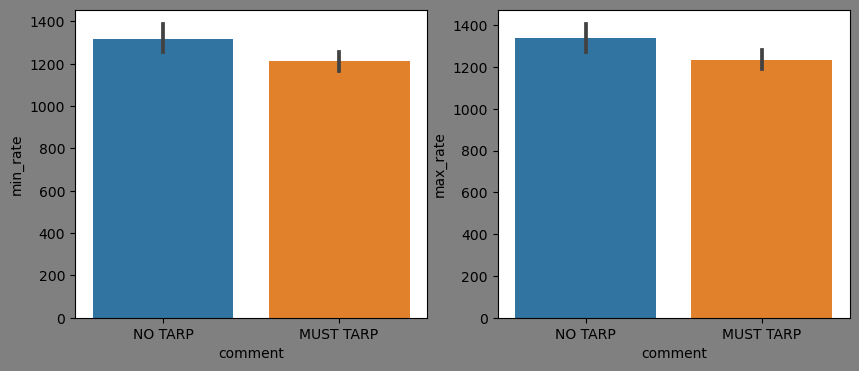

In [221]:
fig,axs=plt.subplots(1,2,figsize=(10,4),facecolor='Grey')
sns.barplot(x='comment',y='min_rate',data=df,ax=axs[0])
sns.barplot(x='comment',y='max_rate',data=df)

# Observations-

Rates are higher when No tarpoline is required.

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11855 entries, 0 to 11854
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   reference_id           11855 non-null  int64         
 1   added_time             11855 non-null  datetime64[ns]
 2   deleted_time           11855 non-null  datetime64[ns]
 3   time_span              11855 non-null  object        
 4   Hour                   11855 non-null  int64         
 5   Minute                 11855 non-null  int64         
 6   sec                    11855 non-null  int64         
 7   origin_city            11855 non-null  object        
 8   origin_state           11855 non-null  object        
 9   destination_city       11855 non-null  object        
 10  destination_state      11855 non-null  object        
 11  comment                1424 non-null   object        
 12  miles                  11855 non-null  int64         
 13  s

# Checking null values-

In [223]:
df.isnull().sum()

reference_id                 0
added_time                   0
deleted_time                 0
time_span                    0
Hour                         0
Minute                       0
sec                          0
origin_city                  0
origin_state                 0
destination_city             0
destination_state            0
comment                  10431
miles                        0
shipper                  10431
truck_type                3262
min_rate                     0
max_rate                     0
average rate per mile    10432
dtype: int64

<AxesSubplot:>

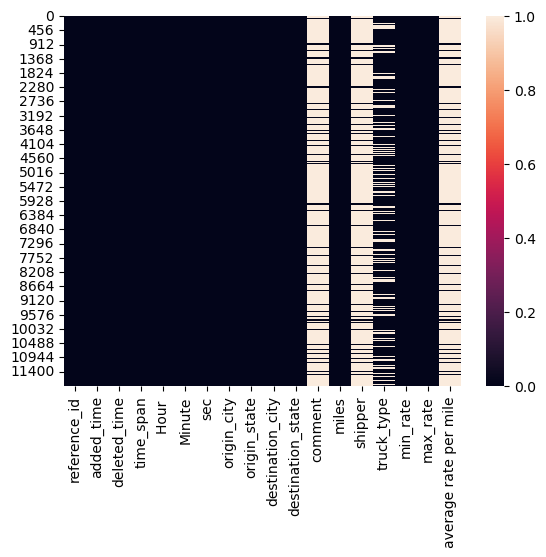

In [224]:
sns.heatmap(df.isnull())

It can be clearly seen that the null values are present in the comment,shipper,truck_type,average rate per mile columns, so its better to drop these columns as the no of null values are very high.

In [225]:
df=df.drop(columns=['comment','shipper','average rate per mile'],axis=1)
df

,reference_id,added_time,deleted_time,time_span,Hour,Minute,sec,origin_city,origin_state,destination_city,destination_state,miles,truck_type,min_rate,max_rate
0,10711141,2023-11-28 12:07:52,2023-11-28 12:10:27,0:02:35,0,2,35,ABEILENE,TX,Ft Worth,TX,0,F,600,600
1,10711143,2023-11-28 11:50:31,2023-11-28 11:53:49,0:03:18,0,3,18,ABEILENE,TX,Ft Worth,TX,0,F,600,600
2,10711145,2023-11-28 12:10:26,2023-11-28 12:27:53,0:17:27,0,17,27,ABEILENE,TX,Ft Worth,TX,0,F,600,600
3,10711151,2023-11-28 11:53:48,2023-11-28 12:02:09,0:08:21,0,8,21,ABEILENE,TX,Ft Worth,TX,0,F,600,600
4,10711155,2023-11-29 10:40:12,2023-11-29 11:37:34,0:57:22,0,57,22,ABEILENE,TX,ORLA,TX,0,F,900,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850,10724771,2023-12-12 08:09:06,2023-12-12 08:13:45,0:04:39,0,4,39,ZWOLLE,LA,SARASOTA,FL,0,F,2150,2150
11851,10726991,2023-12-13 12:48:07,2023-12-14 09:37:28,20:49:21,20,49,21,ZWOLLE,LA,MARYLAND HE,MO,0,F,1100,1250
11852,30316024,2023-12-18 16:31:11,2023-12-18 17:37:42,1:06:31,1,6,31,ZWOLLE,LA,LA VALLE,WI,1055,F,1900,2000
11853,30320680,2023-12-27 09:49:55,2023-12-27 12:04:35,2:14:40,2,14,40,ZWOLLE,LA,COLFAX,WI,1151,F,2100,2100


# Contract addition analysis-

In [226]:
x=df.groupby(df['added_time'].dt.day_name())['reference_id'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
x

,added_time,Count
1,Monday,2615
5,Tuesday,2612
6,Wednesday,2482
4,Thursday,2372
0,Friday,1757
2,Saturday,10
3,Sunday,7


<AxesSubplot:xlabel='added_time', ylabel='Count'>

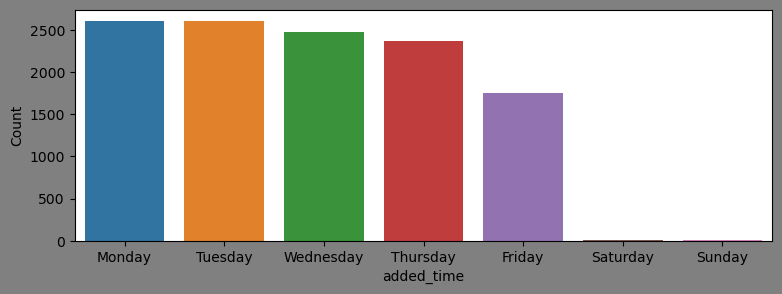

In [227]:
plt.figure(figsize=(9,3),facecolor='Grey')
sns.barplot(x='added_time',y='Count',data=x)

# Observations-

So here we can see that most of the contracts are coming on monday & Tuesday. so in the beggining of the week the contracts addition in the loadboard is highest.

# Contract deletion analysis-

In [228]:
y=df.groupby(df['deleted_time'].dt.day_name())['reference_id'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
y

,deleted_time,Count
1,Monday,2642
4,Thursday,2542
5,Tuesday,2440
6,Wednesday,2425
0,Friday,1764
2,Saturday,22
3,Sunday,20


<AxesSubplot:xlabel='deleted_time', ylabel='Count'>

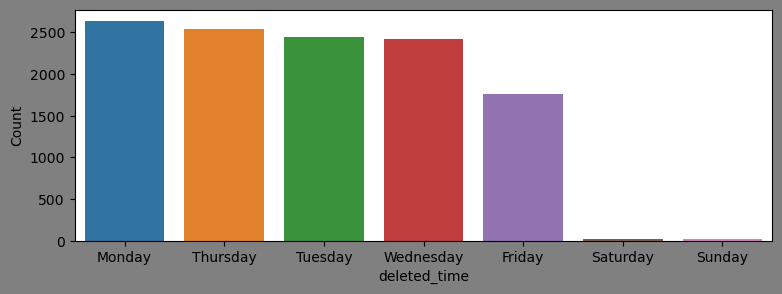

In [229]:
plt.figure(figsize=(9,3),facecolor='Grey')
sns.barplot(x='deleted_time',y='Count',data=y)

# Observations-
1. Similarly here we can see that most of the contracts are getting deleted/sold out on monday & Tuesday. so in the beggining of the week the contracts deletion/getting sold in the loadboard is highest.

2. One thing we can notice here is that on saturday and sunday very less contracts are getting added/getting sold.

In [230]:
df['city lane']=df['origin_city']+'-'+df['destination_city']

In [231]:
df['state lane']=df['origin_state']+'-'+df['destination_state']

In [232]:
df

,reference_id,added_time,deleted_time,time_span,Hour,Minute,sec,origin_city,origin_state,destination_city,destination_state,miles,truck_type,min_rate,max_rate,city lane,state lane
0,10711141,2023-11-28 12:07:52,2023-11-28 12:10:27,0:02:35,0,2,35,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX
1,10711143,2023-11-28 11:50:31,2023-11-28 11:53:49,0:03:18,0,3,18,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX
2,10711145,2023-11-28 12:10:26,2023-11-28 12:27:53,0:17:27,0,17,27,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX
3,10711151,2023-11-28 11:53:48,2023-11-28 12:02:09,0:08:21,0,8,21,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX
4,10711155,2023-11-29 10:40:12,2023-11-29 11:37:34,0:57:22,0,57,22,ABEILENE,TX,ORLA,TX,0,F,900,900,ABEILENE-ORLA,TX-TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850,10724771,2023-12-12 08:09:06,2023-12-12 08:13:45,0:04:39,0,4,39,ZWOLLE,LA,SARASOTA,FL,0,F,2150,2150,ZWOLLE-SARASOTA,LA-FL
11851,10726991,2023-12-13 12:48:07,2023-12-14 09:37:28,20:49:21,20,49,21,ZWOLLE,LA,MARYLAND HE,MO,0,F,1100,1250,ZWOLLE-MARYLAND HE,LA-MO
11852,30316024,2023-12-18 16:31:11,2023-12-18 17:37:42,1:06:31,1,6,31,ZWOLLE,LA,LA VALLE,WI,1055,F,1900,2000,ZWOLLE-LA VALLE,LA-WI
11853,30320680,2023-12-27 09:49:55,2023-12-27 12:04:35,2:14:40,2,14,40,ZWOLLE,LA,COLFAX,WI,1151,F,2100,2100,ZWOLLE-COLFAX,LA-WI


In [233]:
z=df.groupby('city lane')['reference_id'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
z

,city lane,Count
2954,HAZLEHURST-PLANT CITY,34
2333,EUBANK-BLOOMINGDAL,33
4212,MERIDIAN-HALTOM CITY,31
3782,LITTLE RIVE-GRANITE CIT,24
4866,PANAMA CITY-FAIRBURN,24
...,...,...
2766,GROVELAND-TULSA,1
2765,GROVELAND-STIGLER,1
2764,GROVELAND-MT OLIVE,1
2763,GROVELAND-LAUDERDALE,1


# Top 10 most sellabel loads city wise-

In [234]:
z=z.nlargest(10,columns='Count')
z

,city lane,Count
2954,HAZLEHURST-PLANT CITY,34
2333,EUBANK-BLOOMINGDAL,33
4212,MERIDIAN-HALTOM CITY,31
3782,LITTLE RIVE-GRANITE CIT,24
4866,PANAMA CITY-FAIRBURN,24
2140,EASTON-WARRENTON,23
4238,MERIDIAN-SAN ANTONIO,22
790,BOSWELL-SOUTHINGTON,20
1339,CHARLES CIT-WARRENTON,20
495,BATON ROUGE-FT MYERS,19


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'HAZLEHURST-PLANT CITY'),
  Text(1, 0, 'EUBANK-BLOOMINGDAL'),
  Text(2, 0, 'MERIDIAN-HALTOM CITY'),
  Text(3, 0, 'LITTLE RIVE-GRANITE CIT'),
  Text(4, 0, 'PANAMA CITY-FAIRBURN'),
  Text(5, 0, 'EASTON-WARRENTON'),
  Text(6, 0, 'MERIDIAN-SAN ANTONIO'),
  Text(7, 0, 'BOSWELL-SOUTHINGTON'),
  Text(8, 0, 'CHARLES CIT-WARRENTON'),
  Text(9, 0, 'BATON ROUGE-FT MYERS')])

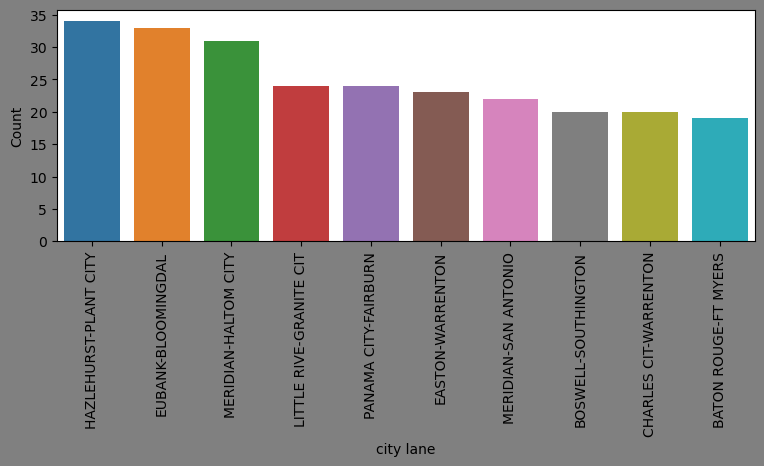

In [235]:
plt.figure(figsize=(9,3),facecolor='Grey')
sns.barplot(x='city lane',y='Count',data=z)
plt.xticks(rotation=90)

# Top 10 most sellabel loads state wise-

In [236]:
z=df.groupby('state lane')['reference_id'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
z

,state lane,Count
888,TX-TX,443
195,FL-FL,350
408,LA-TX,258
575,MS-TX,238
87,AR-TX,237
...,...,...
641,NE-IN,1
821,SK-CO,1
640,NE-IA,1
639,ND-WY,1


In [237]:
z=z.nlargest(10,columns='Count')
z

,state lane,Count
888,TX-TX,443
195,FL-FL,350
408,LA-TX,258
575,MS-TX,238
87,AR-TX,237
230,GA-FL,196
723,OR-CA,175
196,FL-GA,139
978,WI-WI,138
27,AL-FL,115


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'TX-TX'),
  Text(1, 0, 'FL-FL'),
  Text(2, 0, 'LA-TX'),
  Text(3, 0, 'MS-TX'),
  Text(4, 0, 'AR-TX'),
  Text(5, 0, 'GA-FL'),
  Text(6, 0, 'OR-CA'),
  Text(7, 0, 'FL-GA'),
  Text(8, 0, 'WI-WI'),
  Text(9, 0, 'AL-FL')])

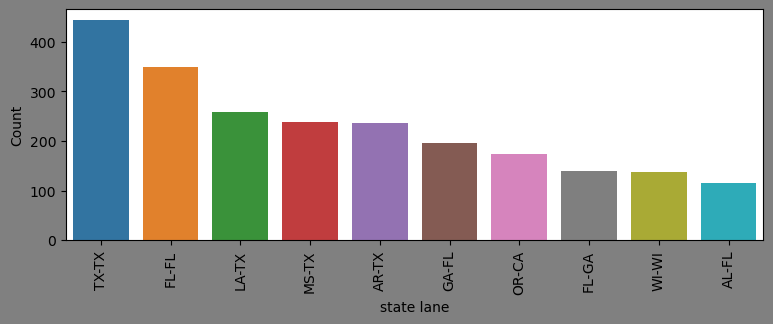

In [238]:
plt.figure(figsize=(9,3),facecolor='Grey')
sns.barplot(x='state lane',y='Count',data=z)
plt.xticks(rotation=90)

# 

# Quickly selling loads-

In [239]:
df

,reference_id,added_time,deleted_time,time_span,Hour,Minute,sec,origin_city,origin_state,destination_city,destination_state,miles,truck_type,min_rate,max_rate,city lane,state lane
0,10711141,2023-11-28 12:07:52,2023-11-28 12:10:27,0:02:35,0,2,35,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX
1,10711143,2023-11-28 11:50:31,2023-11-28 11:53:49,0:03:18,0,3,18,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX
2,10711145,2023-11-28 12:10:26,2023-11-28 12:27:53,0:17:27,0,17,27,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX
3,10711151,2023-11-28 11:53:48,2023-11-28 12:02:09,0:08:21,0,8,21,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX
4,10711155,2023-11-29 10:40:12,2023-11-29 11:37:34,0:57:22,0,57,22,ABEILENE,TX,ORLA,TX,0,F,900,900,ABEILENE-ORLA,TX-TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850,10724771,2023-12-12 08:09:06,2023-12-12 08:13:45,0:04:39,0,4,39,ZWOLLE,LA,SARASOTA,FL,0,F,2150,2150,ZWOLLE-SARASOTA,LA-FL
11851,10726991,2023-12-13 12:48:07,2023-12-14 09:37:28,20:49:21,20,49,21,ZWOLLE,LA,MARYLAND HE,MO,0,F,1100,1250,ZWOLLE-MARYLAND HE,LA-MO
11852,30316024,2023-12-18 16:31:11,2023-12-18 17:37:42,1:06:31,1,6,31,ZWOLLE,LA,LA VALLE,WI,1055,F,1900,2000,ZWOLLE-LA VALLE,LA-WI
11853,30320680,2023-12-27 09:49:55,2023-12-27 12:04:35,2:14:40,2,14,40,ZWOLLE,LA,COLFAX,WI,1151,F,2100,2100,ZWOLLE-COLFAX,LA-WI


In [240]:
df['total_time_taken']=df['Hour ']*60+df['Minute']

In [241]:
df

,reference_id,added_time,deleted_time,time_span,Hour,Minute,sec,origin_city,origin_state,destination_city,destination_state,miles,truck_type,min_rate,max_rate,city lane,state lane,total_time_taken
0,10711141,2023-11-28 12:07:52,2023-11-28 12:10:27,0:02:35,0,2,35,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,2
1,10711143,2023-11-28 11:50:31,2023-11-28 11:53:49,0:03:18,0,3,18,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,3
2,10711145,2023-11-28 12:10:26,2023-11-28 12:27:53,0:17:27,0,17,27,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,17
3,10711151,2023-11-28 11:53:48,2023-11-28 12:02:09,0:08:21,0,8,21,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,8
4,10711155,2023-11-29 10:40:12,2023-11-29 11:37:34,0:57:22,0,57,22,ABEILENE,TX,ORLA,TX,0,F,900,900,ABEILENE-ORLA,TX-TX,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850,10724771,2023-12-12 08:09:06,2023-12-12 08:13:45,0:04:39,0,4,39,ZWOLLE,LA,SARASOTA,FL,0,F,2150,2150,ZWOLLE-SARASOTA,LA-FL,4
11851,10726991,2023-12-13 12:48:07,2023-12-14 09:37:28,20:49:21,20,49,21,ZWOLLE,LA,MARYLAND HE,MO,0,F,1100,1250,ZWOLLE-MARYLAND HE,LA-MO,1249
11852,30316024,2023-12-18 16:31:11,2023-12-18 17:37:42,1:06:31,1,6,31,ZWOLLE,LA,LA VALLE,WI,1055,F,1900,2000,ZWOLLE-LA VALLE,LA-WI,66
11853,30320680,2023-12-27 09:49:55,2023-12-27 12:04:35,2:14:40,2,14,40,ZWOLLE,LA,COLFAX,WI,1151,F,2100,2100,ZWOLLE-COLFAX,LA-WI,134


# Quickly selling loads city wise-

In [242]:
y=df.groupby('city lane')['total_time_taken'].mean().reset_index(name='total_time_taken').sort_values(by='total_time_taken',ascending=True)
y.head(50)

,city lane,total_time_taken
1129,CAPE CANAVE-WARNER ROBI,0.000000
4725,OAKTOWN-CARLTON,0.000000
2299,ENFIELD-FUQUAY-VARI,0.000000
5898,TAMPA-JASPER,0.000000
4181,MEMPHIS-KISSIMMEE,0.000000
3156,HOUSTON-LA PORTE,0.000000
2239,ELKIN-MARIETTA,0.000000
1073,CAPE CANAVE-MOORESVILLE,0.000000
1708,CORRIGAN-FRISCO,0.000000
4947,PARSHALL-KANSAS CITY,0.000000


# Quickly selling loads state wise-

In [243]:
y=df.groupby('state lane')['total_time_taken'].mean().reset_index(name='total_time_taken').sort_values(by='total_time_taken',ascending=True)
y.head(50)

,state lane,total_time_taken
985,WV-NJ,0.500000
43,AL-NJ,1.000000
329,IN-AL,1.000000
352,KS-KS,1.000000
686,NY-WV,1.000000
886,TX-SC,1.000000
1,AB-CO,2.000000
592,MT-NY,2.000000
786,SC-AR,3.000000
222,FL-VT,5.000000


# Observations-

1. Here you can see that there is a problem here we can see that there are many loads get sold out in even 0 and 1 minute which is not possible,so this condition is now compelling us to remove the outliers.

2. Outliers are the ones which are deflecting our analysis in a different direction.

# 

# Deep analysis after removing outliers-

# Detecting outliers on the basis of time span-

In [244]:
df

,reference_id,added_time,deleted_time,time_span,Hour,Minute,sec,origin_city,origin_state,destination_city,destination_state,miles,truck_type,min_rate,max_rate,city lane,state lane,total_time_taken
0,10711141,2023-11-28 12:07:52,2023-11-28 12:10:27,0:02:35,0,2,35,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,2
1,10711143,2023-11-28 11:50:31,2023-11-28 11:53:49,0:03:18,0,3,18,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,3
2,10711145,2023-11-28 12:10:26,2023-11-28 12:27:53,0:17:27,0,17,27,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,17
3,10711151,2023-11-28 11:53:48,2023-11-28 12:02:09,0:08:21,0,8,21,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,8
4,10711155,2023-11-29 10:40:12,2023-11-29 11:37:34,0:57:22,0,57,22,ABEILENE,TX,ORLA,TX,0,F,900,900,ABEILENE-ORLA,TX-TX,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850,10724771,2023-12-12 08:09:06,2023-12-12 08:13:45,0:04:39,0,4,39,ZWOLLE,LA,SARASOTA,FL,0,F,2150,2150,ZWOLLE-SARASOTA,LA-FL,4
11851,10726991,2023-12-13 12:48:07,2023-12-14 09:37:28,20:49:21,20,49,21,ZWOLLE,LA,MARYLAND HE,MO,0,F,1100,1250,ZWOLLE-MARYLAND HE,LA-MO,1249
11852,30316024,2023-12-18 16:31:11,2023-12-18 17:37:42,1:06:31,1,6,31,ZWOLLE,LA,LA VALLE,WI,1055,F,1900,2000,ZWOLLE-LA VALLE,LA-WI,66
11853,30320680,2023-12-27 09:49:55,2023-12-27 12:04:35,2:14:40,2,14,40,ZWOLLE,LA,COLFAX,WI,1151,F,2100,2100,ZWOLLE-COLFAX,LA-WI,134


In [245]:
df['min_rate'].min()

12

In [246]:
df['min_rate'].max()

10000

In [247]:
df['max_rate'].min()

12

In [248]:
df['min_rate'].max()

10000

In [249]:
continous=[]

for i in df.columns:
    if df[i].dtypes=='int64':
        continous.append(i)

In [250]:
continous

['reference_id',
 'Hour ',
 'Minute',
 'sec',
 'miles',
 'min_rate',
 'max_rate',
 'total_time_taken']

In [251]:
for i in df.columns:
    if df[i].dtypes=='float64':
        continous.append(i)

In [252]:
continous

['reference_id',
 'Hour ',
 'Minute',
 'sec',
 'miles',
 'min_rate',
 'max_rate',
 'total_time_taken']

C:\Users\prate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

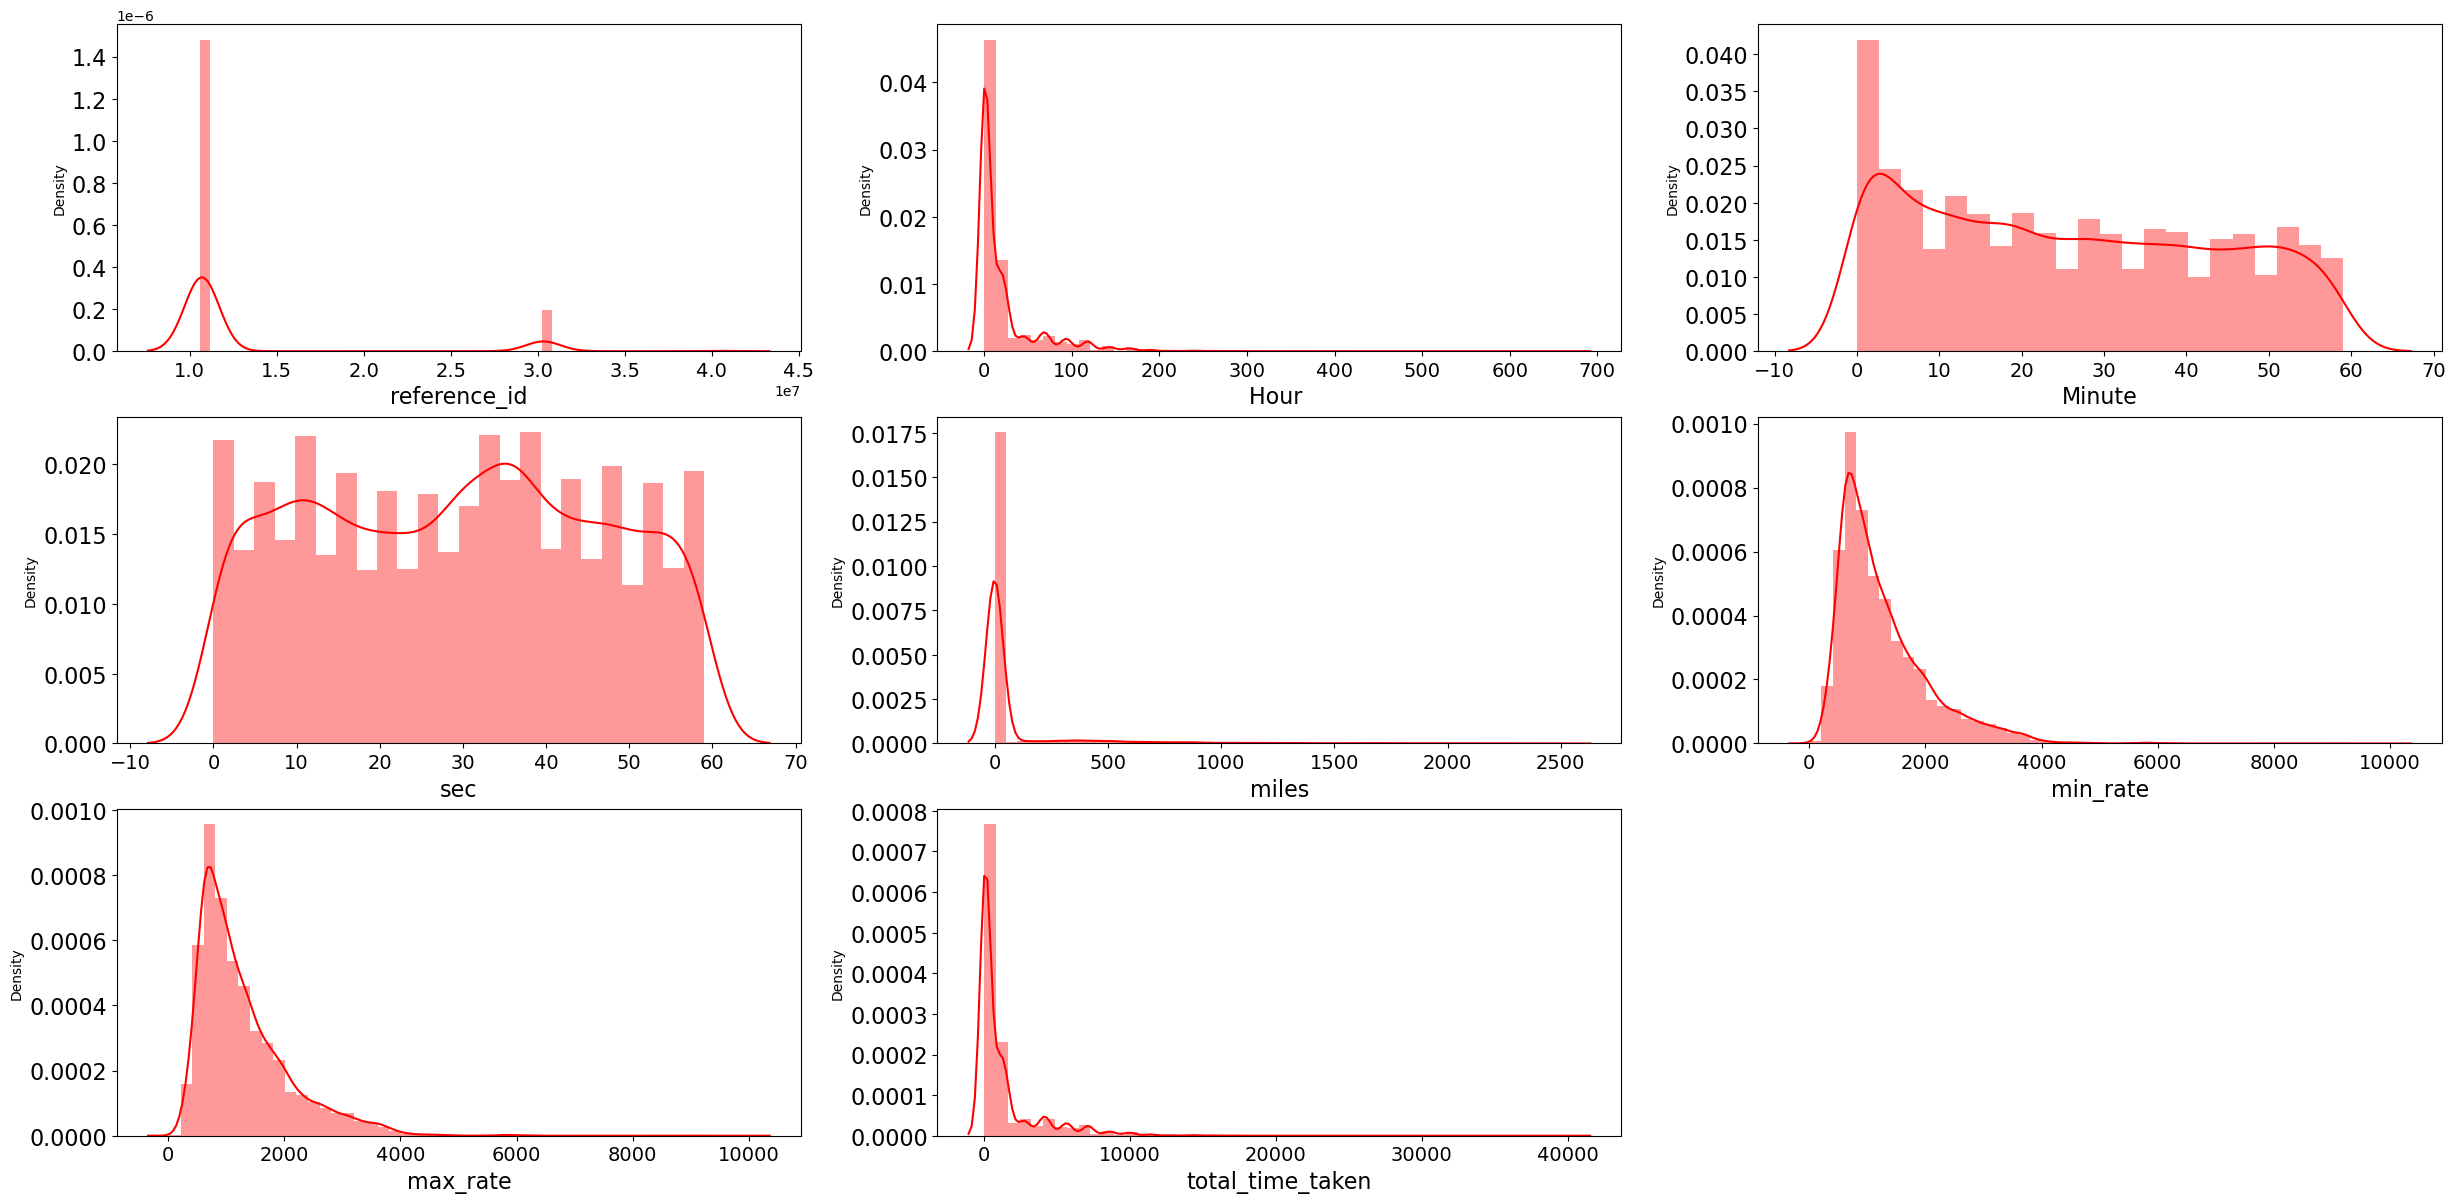

In [253]:
plt.figure(figsize=(30,45))
plotnumber=1

for col in continous:
    if plotnumber<=35:
        ax=plt.subplot(9,3,plotnumber)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show() 

# Observations-

1. Here we can see that Hour,Min rate and max rate has the outliers which can be clearly seen in the above diagram as the distribution is right skewed.

In [254]:
df.skew()

C:\Users\prate\AppData\Local\Temp\ipykernel_8640\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


reference_id        2.391669
Hour                3.282987
Minute              0.218474
sec                -0.008818
miles               4.605324
min_rate            1.666568
max_rate            1.654656
total_time_taken    3.278614
dtype: float64

C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prate\anaconda3\lib\si

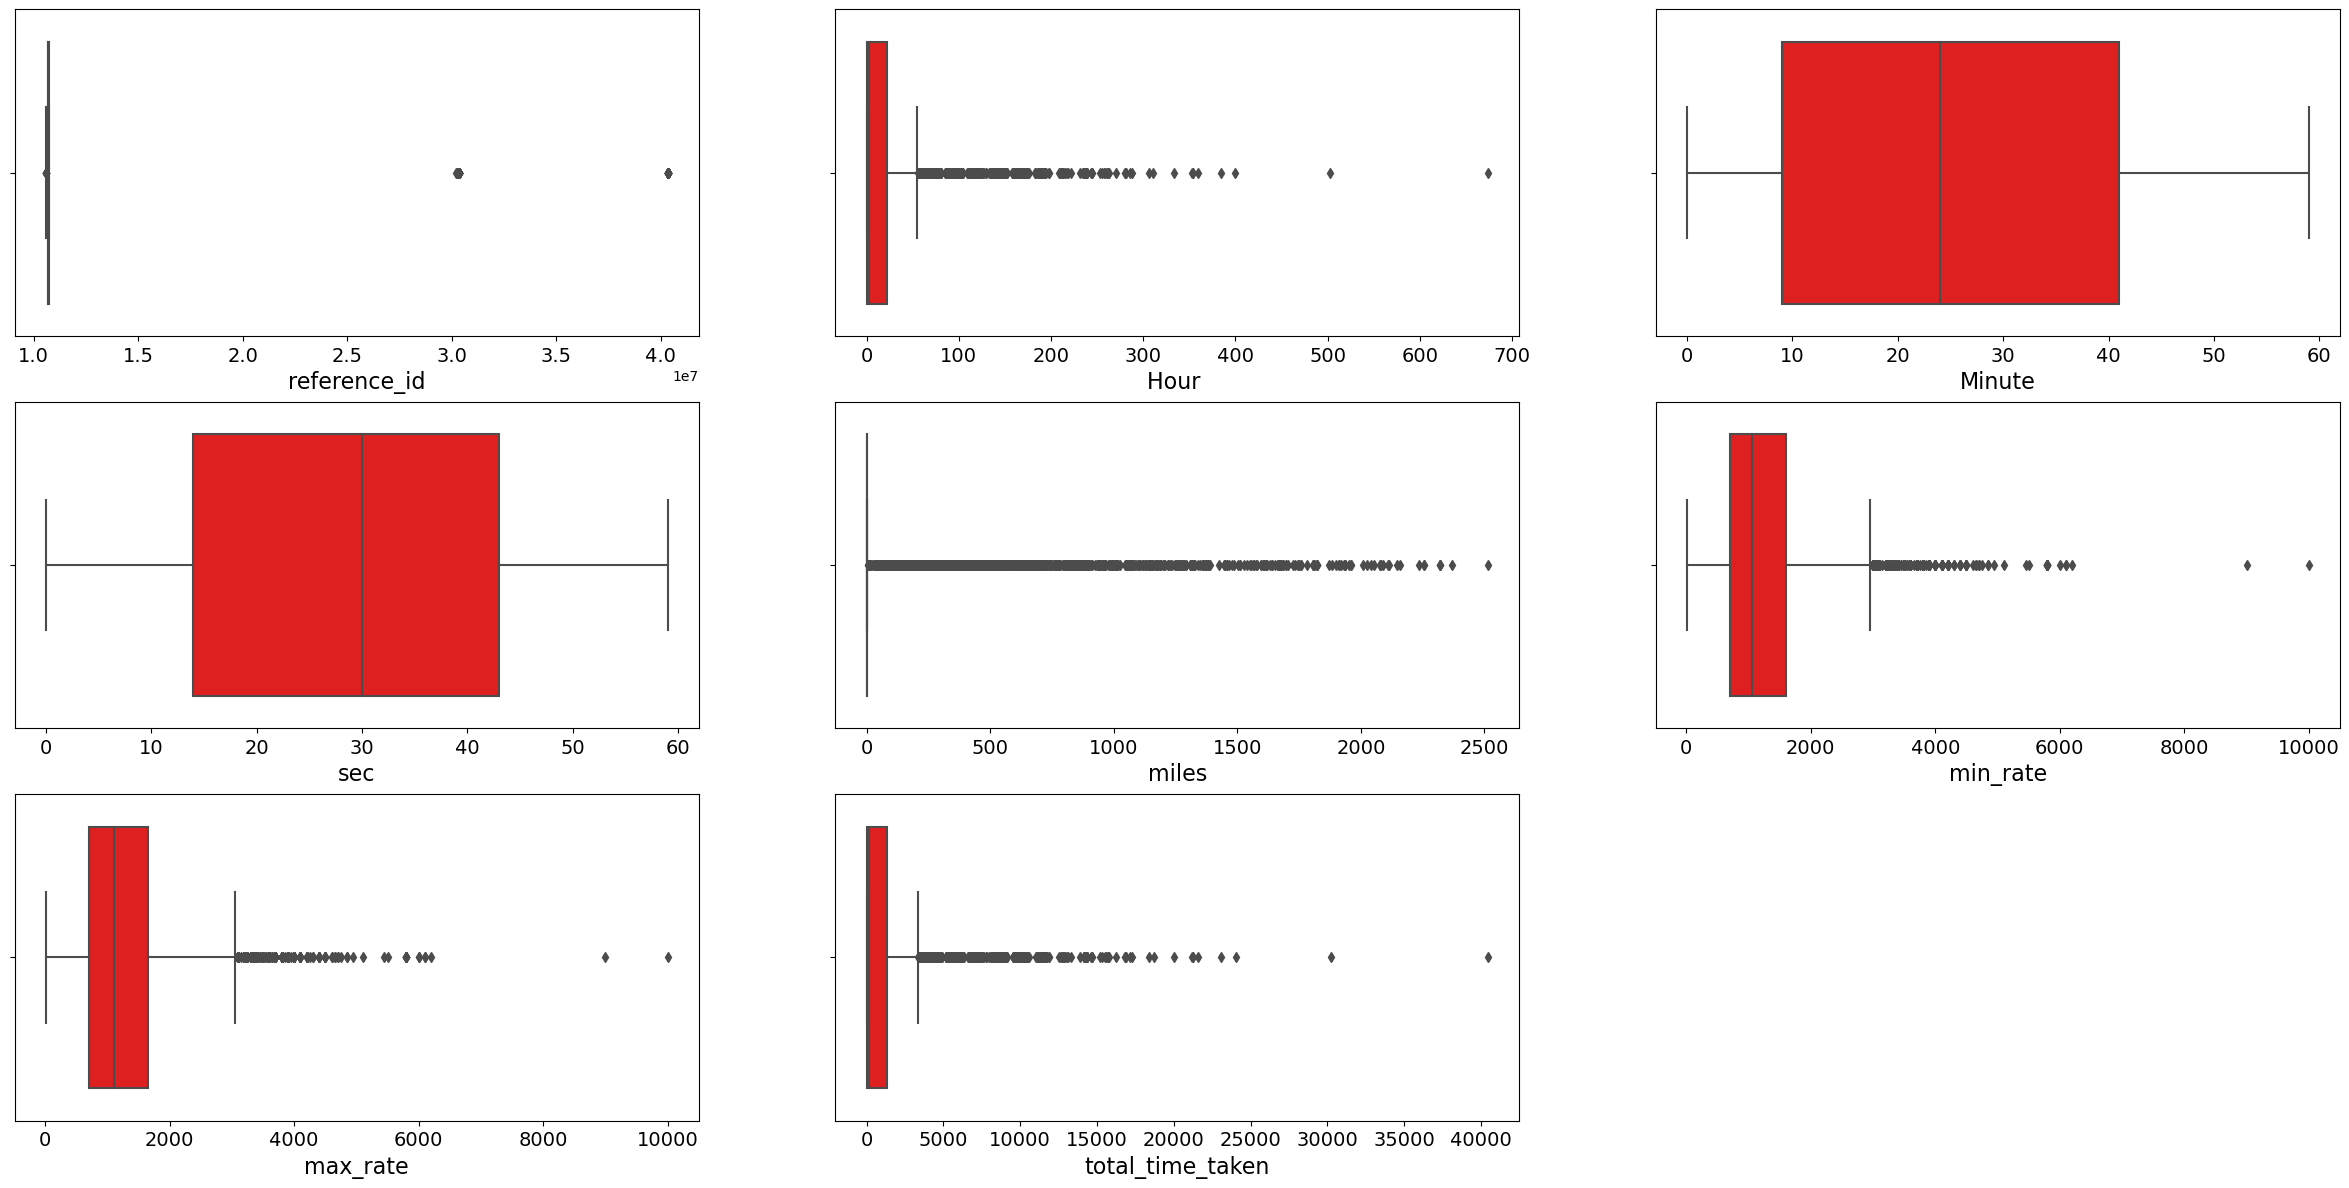

In [255]:
plt.figure(figsize=(30,45))
plotnumber=1

for col in continous:
    if plotnumber<=35:
        ax=plt.subplot(9,3,plotnumber)
        sns.boxplot(df[col],color='r')
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()

In [256]:
df[df['total_time_taken']==40474]

,reference_id,added_time,deleted_time,time_span,Hour,Minute,sec,origin_city,origin_state,destination_city,destination_state,miles,truck_type,min_rate,max_rate,city lane,state lane,total_time_taken
11325,10689739,2023-11-06 08:39:38,2023-12-04 11:13:47,674:34:09,674,34,9,WARREN,AR,DAYTONA BEA,FL,0,F,2000,2750,WARREN-DAYTONA BEA,AR-FL,40474


In [257]:
df['total_time_taken'].max()

40474

This is an outlier point i think.

In [258]:
df['total_time_taken']=df['total_time_taken'].fillna(df['total_time_taken'].mean())

In [259]:
#upper side outliers-q3+(1.5*IQR)
#lower side outliers-q1-(1.5*IQR)


q1=df['total_time_taken'].quantile(0.25)
q3=df['total_time_taken'].quantile(0.75)

IQR=q3-q1

In [260]:
q1

35.0

In [261]:
q3

1349.0

In [262]:
df.columns

Index(['reference_id', 'added_time', 'deleted_time', 'time_span', 'Hour ',
       'Minute', 'sec', 'origin_city', 'origin_state', 'destination_city',
       'destination_state', 'miles', 'truck_type', 'min_rate', 'max_rate',
       'city lane', 'state lane', 'total_time_taken'],
      dtype='object')

In [263]:
df1=df[(df['total_time_taken']>1)].reset_index()
df1=df1.drop(columns='index',axis=1)
df1

,reference_id,added_time,deleted_time,time_span,Hour,Minute,sec,origin_city,origin_state,destination_city,destination_state,miles,truck_type,min_rate,max_rate,city lane,state lane,total_time_taken
0,10711141,2023-11-28 12:07:52,2023-11-28 12:10:27,0:02:35,0,2,35,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,2
1,10711143,2023-11-28 11:50:31,2023-11-28 11:53:49,0:03:18,0,3,18,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,3
2,10711145,2023-11-28 12:10:26,2023-11-28 12:27:53,0:17:27,0,17,27,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,17
3,10711151,2023-11-28 11:53:48,2023-11-28 12:02:09,0:08:21,0,8,21,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,8
4,10711155,2023-11-29 10:40:12,2023-11-29 11:37:34,0:57:22,0,57,22,ABEILENE,TX,ORLA,TX,0,F,900,900,ABEILENE-ORLA,TX-TX,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11126,10724771,2023-12-12 08:09:06,2023-12-12 08:13:45,0:04:39,0,4,39,ZWOLLE,LA,SARASOTA,FL,0,F,2150,2150,ZWOLLE-SARASOTA,LA-FL,4
11127,10726991,2023-12-13 12:48:07,2023-12-14 09:37:28,20:49:21,20,49,21,ZWOLLE,LA,MARYLAND HE,MO,0,F,1100,1250,ZWOLLE-MARYLAND HE,LA-MO,1249
11128,30316024,2023-12-18 16:31:11,2023-12-18 17:37:42,1:06:31,1,6,31,ZWOLLE,LA,LA VALLE,WI,1055,F,1900,2000,ZWOLLE-LA VALLE,LA-WI,66
11129,30320680,2023-12-27 09:49:55,2023-12-27 12:04:35,2:14:40,2,14,40,ZWOLLE,LA,COLFAX,WI,1151,F,2100,2100,ZWOLLE-COLFAX,LA-WI,134


C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prate\anaconda3\lib\si

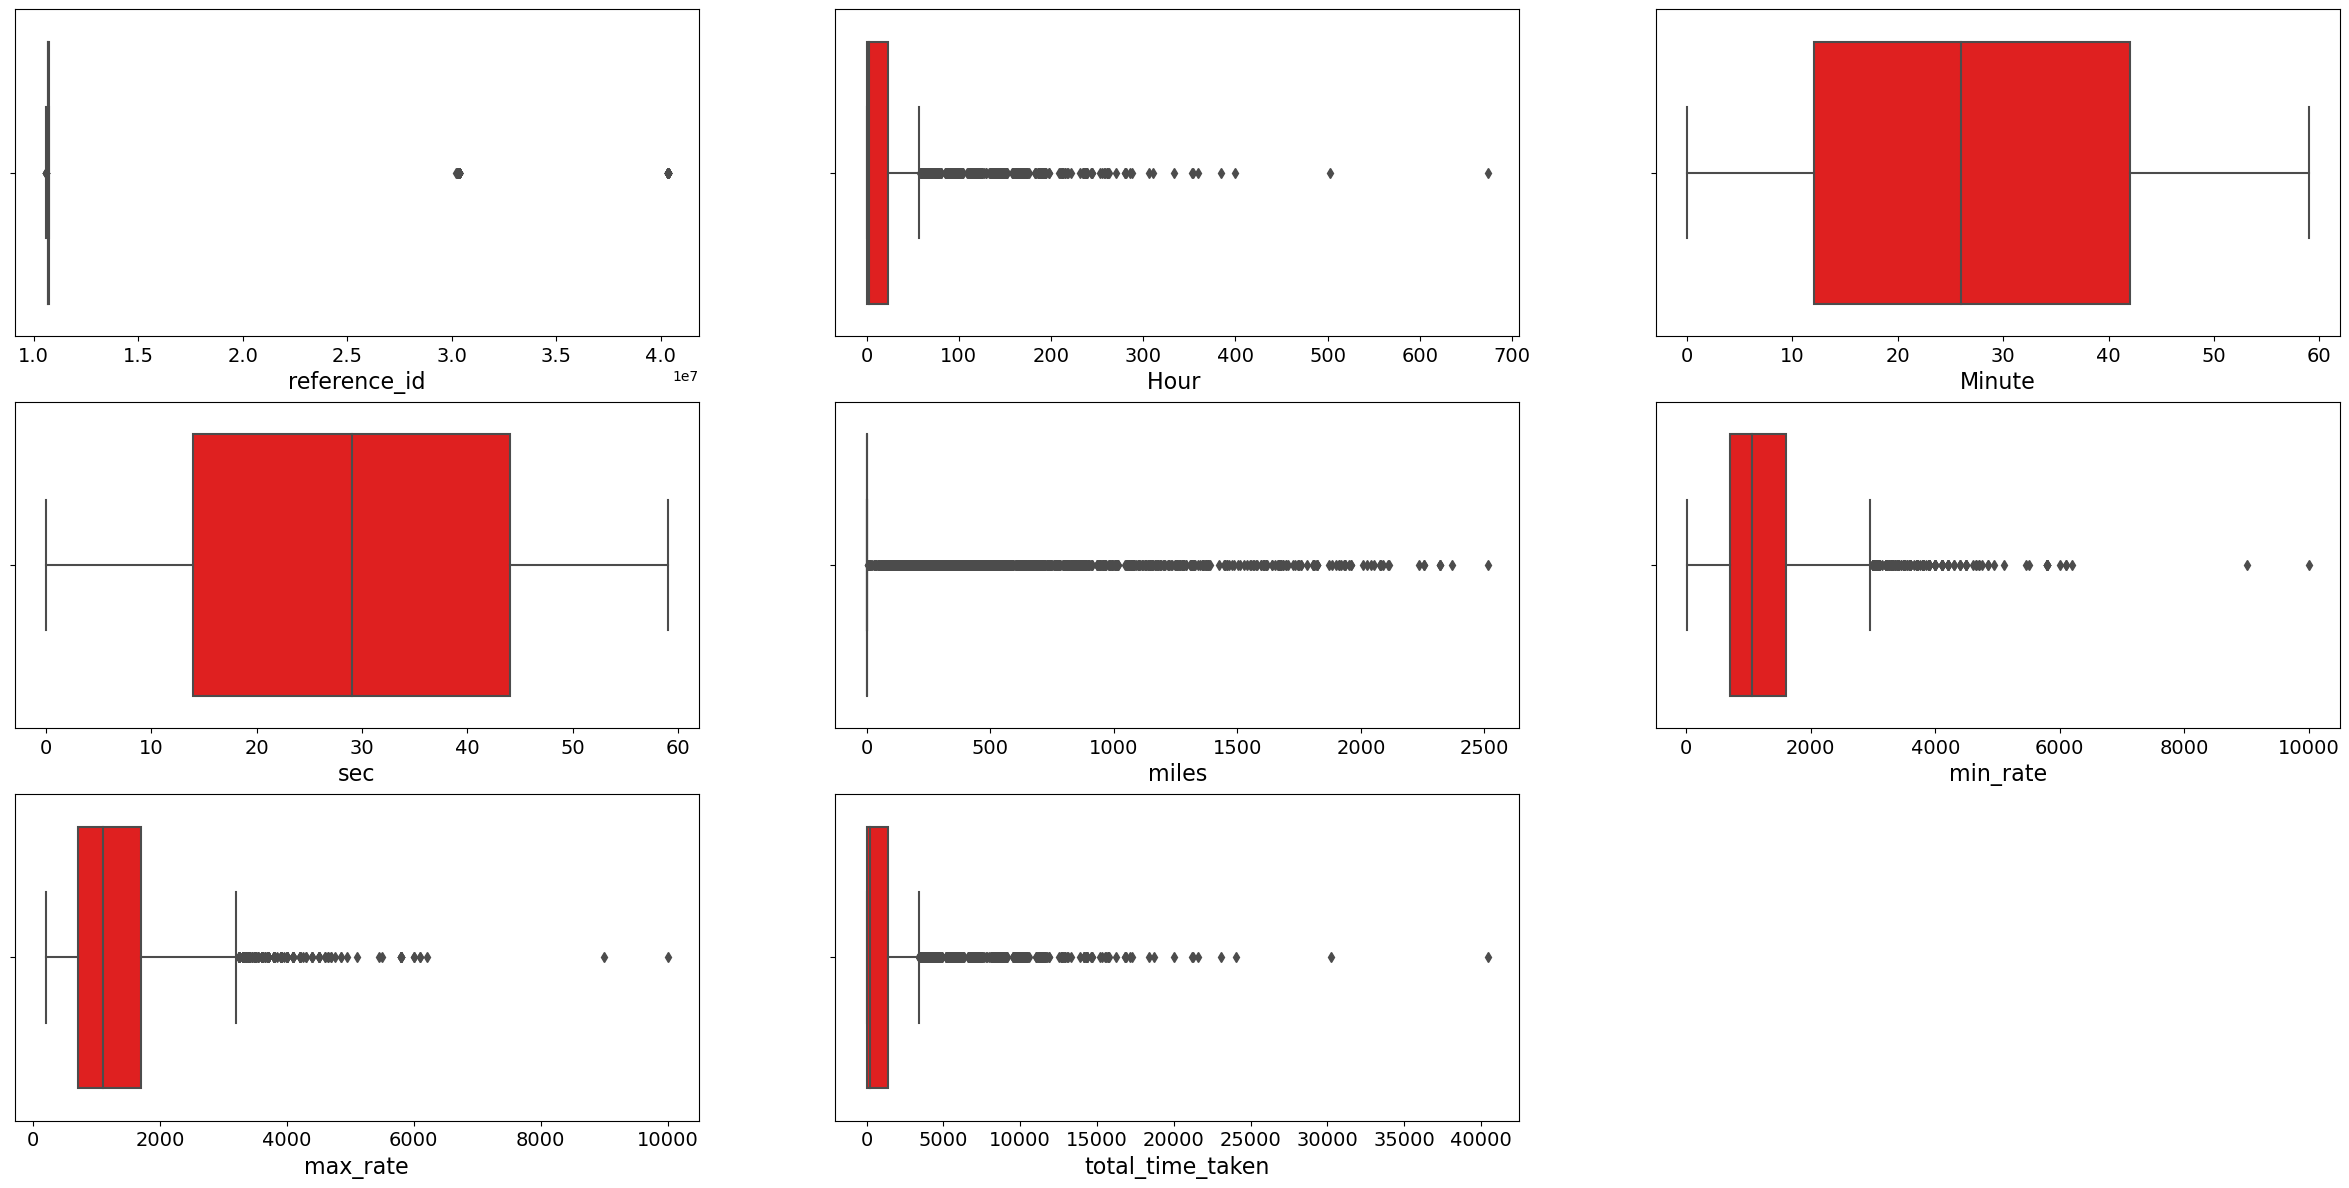

In [264]:
plt.figure(figsize=(30,45))
plotnumber=1

for col in continous:
    if plotnumber<=35:
        ax=plt.subplot(9,3,plotnumber)
        sns.boxplot(df1[col],color='r')
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()

In [265]:
df1

,reference_id,added_time,deleted_time,time_span,Hour,Minute,sec,origin_city,origin_state,destination_city,destination_state,miles,truck_type,min_rate,max_rate,city lane,state lane,total_time_taken
0,10711141,2023-11-28 12:07:52,2023-11-28 12:10:27,0:02:35,0,2,35,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,2
1,10711143,2023-11-28 11:50:31,2023-11-28 11:53:49,0:03:18,0,3,18,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,3
2,10711145,2023-11-28 12:10:26,2023-11-28 12:27:53,0:17:27,0,17,27,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,17
3,10711151,2023-11-28 11:53:48,2023-11-28 12:02:09,0:08:21,0,8,21,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,8
4,10711155,2023-11-29 10:40:12,2023-11-29 11:37:34,0:57:22,0,57,22,ABEILENE,TX,ORLA,TX,0,F,900,900,ABEILENE-ORLA,TX-TX,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11126,10724771,2023-12-12 08:09:06,2023-12-12 08:13:45,0:04:39,0,4,39,ZWOLLE,LA,SARASOTA,FL,0,F,2150,2150,ZWOLLE-SARASOTA,LA-FL,4
11127,10726991,2023-12-13 12:48:07,2023-12-14 09:37:28,20:49:21,20,49,21,ZWOLLE,LA,MARYLAND HE,MO,0,F,1100,1250,ZWOLLE-MARYLAND HE,LA-MO,1249
11128,30316024,2023-12-18 16:31:11,2023-12-18 17:37:42,1:06:31,1,6,31,ZWOLLE,LA,LA VALLE,WI,1055,F,1900,2000,ZWOLLE-LA VALLE,LA-WI,66
11129,30320680,2023-12-27 09:49:55,2023-12-27 12:04:35,2:14:40,2,14,40,ZWOLLE,LA,COLFAX,WI,1151,F,2100,2100,ZWOLLE-COLFAX,LA-WI,134


So we can say now these are the most genuine loads.

# Contract addition analysis-

In [266]:
x=df1.groupby(df['added_time'].dt.day_name())['reference_id'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
x

,added_time,Count
1,Monday,2479
5,Tuesday,2441
6,Wednesday,2327
4,Thursday,2212
0,Friday,1656
2,Saturday,9
3,Sunday,7


<AxesSubplot:xlabel='added_time', ylabel='Count'>

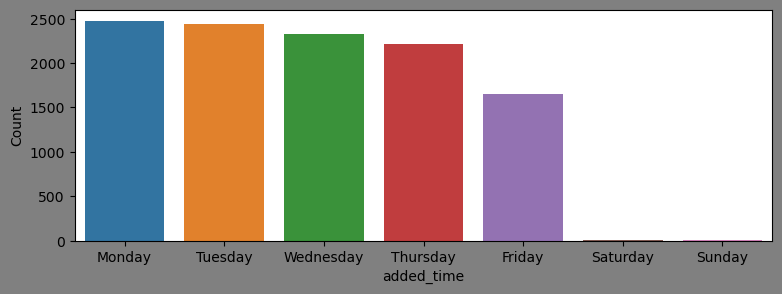

In [267]:
plt.figure(figsize=(9,3),facecolor='Grey')
sns.barplot(x='added_time',y='Count',data=x)

# Observations-

So here we can see that most of the contracts are coming on monday & Tuesday. so in the beggining of the week the contracts addition in the loadboard is highest.

# Contract deletion analysis-

In [268]:
y=df1.groupby(df['deleted_time'].dt.day_name())['reference_id'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
y

,deleted_time,Count
1,Monday,2502
4,Thursday,2381
5,Tuesday,2292
6,Wednesday,2264
0,Friday,1651
2,Saturday,21
3,Sunday,20


<AxesSubplot:xlabel='deleted_time', ylabel='Count'>

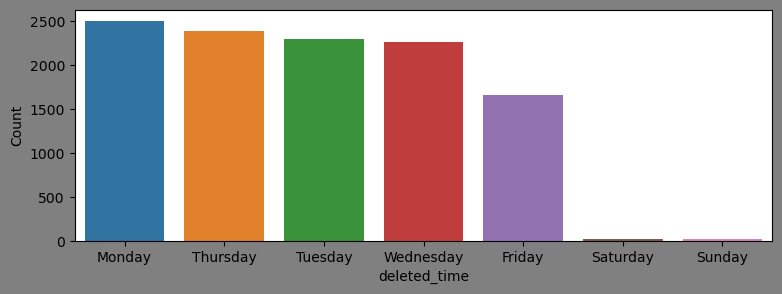

In [269]:
plt.figure(figsize=(9,3),facecolor='Grey')
sns.barplot(x='deleted_time',y='Count',data=y)

# Observations-
1. Similarly here we can see that most of the contracts are getting deleted/sold out on monday & Tuesday. so in the beggining of the week the contracts deletion/getting sold in the loadboard is highest.

2. One thing we can notice here is that on saturday and sunday very less contracts are getting added/getting sold.

#  Most sellabel loads City wise-

In [270]:
z=df1.groupby('city lane')['reference_id'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
z

,city lane,Count
2901,HAZLEHURST-PLANT CITY,33
2289,EUBANK-BLOOMINGDAL,31
4144,MERIDIAN-HALTOM CITY,28
4170,MERIDIAN-SAN ANTONIO,21
4789,PANAMA CITY-FAIRBURN,20
...,...,...
2679,GRENADA-GRABILL,1
2678,GRENADA-GAINESVILLE,1
2677,GRENADA-ELKTON,1
2676,GRENADA-DOUGLAS,1


In [271]:
z=z.nlargest(10,columns='Count')
z

,city lane,Count
2901,HAZLEHURST-PLANT CITY,33
2289,EUBANK-BLOOMINGDAL,31
4144,MERIDIAN-HALTOM CITY,28
4170,MERIDIAN-SAN ANTONIO,21
4789,PANAMA CITY-FAIRBURN,20
2101,EASTON-WARRENTON,20
486,BATON ROUGE-FT MYERS,19
2694,GRENADA-PORT BARRE,18
5901,VERNAL-BRUSH,17
1968,DOUGLAS-UPTON,17


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'HAZLEHURST-PLANT CITY'),
  Text(1, 0, 'EUBANK-BLOOMINGDAL'),
  Text(2, 0, 'MERIDIAN-HALTOM CITY'),
  Text(3, 0, 'MERIDIAN-SAN ANTONIO'),
  Text(4, 0, 'PANAMA CITY-FAIRBURN'),
  Text(5, 0, 'EASTON-WARRENTON'),
  Text(6, 0, 'BATON ROUGE-FT MYERS'),
  Text(7, 0, 'GRENADA-PORT BARRE'),
  Text(8, 0, 'VERNAL-BRUSH'),
  Text(9, 0, 'DOUGLAS-UPTON')])

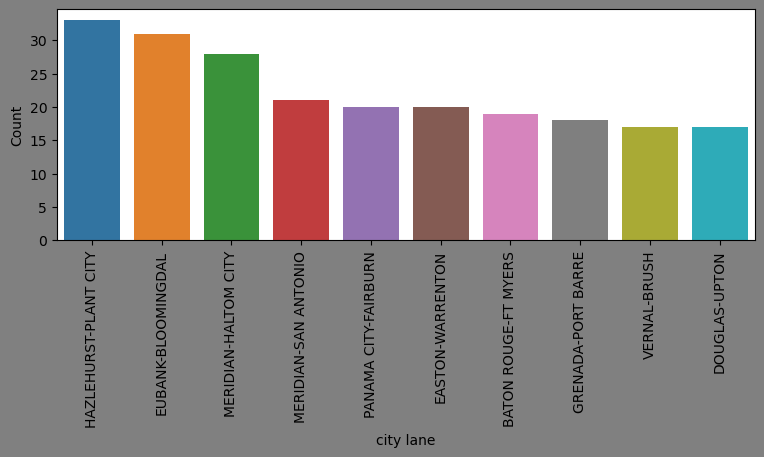

In [272]:
plt.figure(figsize=(9,3),facecolor='Grey')
sns.barplot(x='city lane',y='Count',data=z)
plt.xticks(rotation=90)

# Top 10 most sellabel loads State wise-

In [273]:
z=df1.groupby('state lane')['reference_id'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
z

,state lane,Count
884,TX-TX,392
194,FL-FL,326
405,LA-TX,247
86,AR-TX,230
572,MS-TX,227
...,...,...
701,OK-FL,1
294,ID-VA,1
697,OH-WI,1
297,ID-WV,1


In [274]:
z=z.nlargest(10,columns='Count')
z

,state lane,Count
884,TX-TX,392
194,FL-FL,326
405,LA-TX,247
86,AR-TX,230
572,MS-TX,227
229,GA-FL,190
719,OR-CA,173
974,WI-WI,134
195,FL-GA,110
27,AL-FL,103


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'TX-TX'),
  Text(1, 0, 'FL-FL'),
  Text(2, 0, 'LA-TX'),
  Text(3, 0, 'AR-TX'),
  Text(4, 0, 'MS-TX'),
  Text(5, 0, 'GA-FL'),
  Text(6, 0, 'OR-CA'),
  Text(7, 0, 'WI-WI'),
  Text(8, 0, 'FL-GA'),
  Text(9, 0, 'AL-FL')])

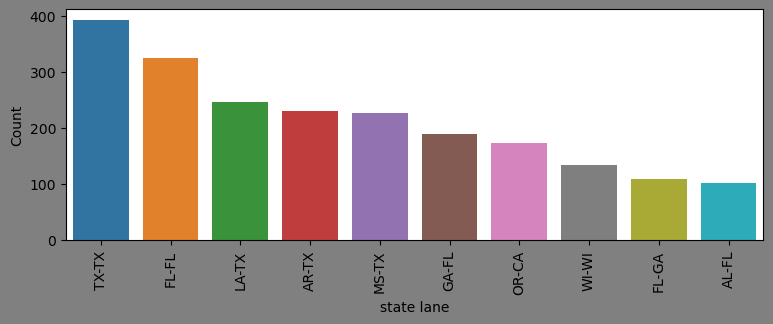

In [275]:
plt.figure(figsize=(9,3),facecolor='Grey')
sns.barplot(x='state lane',y='Count',data=z)
plt.xticks(rotation=90)

# 

# Quickly selling loads-(Getting sold out in less than 1 hr)


In [276]:
x=df1[df1['total_time_taken']<60]
x

,reference_id,added_time,deleted_time,time_span,Hour,Minute,sec,origin_city,origin_state,destination_city,destination_state,miles,truck_type,min_rate,max_rate,city lane,state lane,total_time_taken
0,10711141,2023-11-28 12:07:52,2023-11-28 12:10:27,0:02:35,0,2,35,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,2
1,10711143,2023-11-28 11:50:31,2023-11-28 11:53:49,0:03:18,0,3,18,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,3
2,10711145,2023-11-28 12:10:26,2023-11-28 12:27:53,0:17:27,0,17,27,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,17
3,10711151,2023-11-28 11:53:48,2023-11-28 12:02:09,0:08:21,0,8,21,ABEILENE,TX,Ft Worth,TX,0,F,600,600,ABEILENE-Ft Worth,TX-TX,8
4,10711155,2023-11-29 10:40:12,2023-11-29 11:37:34,0:57:22,0,57,22,ABEILENE,TX,ORLA,TX,0,F,900,900,ABEILENE-ORLA,TX-TX,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11105,10695799,2023-11-10 09:36:55,2023-11-10 09:48:46,0:11:51,0,11,51,ZWOLLE,LA,LA VALLE,WI,0,F,1800,1800,ZWOLLE-LA VALLE,LA-WI,11
11116,10708979,2023-11-27 09:00:55,2023-11-27 09:47:57,0:47:02,0,47,2,ZWOLLE,LA,LA VALLE,WI,0,F,2100,2100,ZWOLLE-LA VALLE,LA-WI,47
11124,10724169,2023-12-12 08:08:30,2023-12-12 08:13:09,0:04:39,0,4,39,ZWOLLE,LA,COCOA,FL,0,F,2100,2100,ZWOLLE-COCOA,LA-FL,4
11126,10724771,2023-12-12 08:09:06,2023-12-12 08:13:45,0:04:39,0,4,39,ZWOLLE,LA,SARASOTA,FL,0,F,2150,2150,ZWOLLE-SARASOTA,LA-FL,4


# Most Quicky sellable loads City wise-

In [277]:
y=x.groupby('city lane')['reference_id'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
y

,city lane,Count
1325,LITTLE RIVE-GRANITE CIT,14
769,EUBANK-BLOOMINGDAL,13
713,EASTON-WARRENTON,13
667,DOUGLAS-UPTON,12
2112,VERNAL-BRUSH,10
...,...,...
1042,HOOD RIVER-COLTON,1
1041,HOOD RIVER-BISHOP,1
1040,HOMERVILLE-LIBERTY,1
1039,HOMERVILLE-HOUSTON,1


So these 748 loads are the most quickly sold loads

In [278]:
z=x.groupby('city lane')['total_time_taken'].mean().reset_index(name='Avg_time_taken').sort_values(by='Avg_time_taken',ascending=False)
z

,city lane,Avg_time_taken
1195,KANSAS CITY-BURNET,59.0
742,ELKHART-PORT NECHES,59.0
1499,MILLERSBURG-BALTIMORE,59.0
1434,MCBAIN-LOUISVILLE,59.0
20,ALBANY-BARTOW,59.0
...,...,...
760,ENFIELD-LILLINGTON,2.0
1547,MT. GILEAD-RIDGEWAY,2.0
768,ETHRIDGE-OPDYKE,2.0
1545,MT. GILEAD-EASTON,2.0


In [279]:
c=pd.merge(y,z)
c.sort_values(by='Avg_time_taken').head(50)

,city lane,Count,Avg_time_taken
1338,ROXBORO-CHESTERFIEL,1,2.0
765,BIG RIVER-MT HOREB,1,2.0
1127,ALBANY-ORLANDO,1,2.0
1792,KANSAS CITY-CHICAGO,1,2.0
534,OKLAHOMA CI-MANSFIELD,1,2.0
1358,ELKIN-FAYETTEVILL,1,2.0
746,MCDAVID-DAYTONA BEA,1,2.0
1371,CAPE CANAVE-FAIRBURN,1,2.0
1992,LAKE CITY-GAINESVILLE,1,2.0
1750,CAPE CANAVE-SAGINAW,1,2.0


so these are the loads which are getting sold out in less than 1 hr.

# 

# Most Quicky sellable loads state wise-

In [280]:
y=x.groupby('state lane')['reference_id'].count().reset_index(name='Count').sort_values(by='Count',ascending=False)
y

,state lane,Count
529,TX-TX,202
107,FL-FL,123
52,AR-TX,72
244,LA-TX,69
354,MS-TX,59
...,...,...
283,MD-ON,1
282,MD-OK,1
277,MD-NE,1
273,MD-ME,1


In [281]:
z=x.groupby('state lane')['total_time_taken'].mean().reset_index(name='Avg_time_taken').sort_values(by='Avg_time_taken',ascending=False)
z

,state lane,Avg_time_taken
175,IL-CO,59.0
336,MO-TX,59.0
441,OR-TN,59.0
295,MI-KY,59.0
513,TX-IA,58.0
...,...,...
361,MT-NY,2.0
429,OR-AZ,2.0
436,OR-NE,2.0
527,TX-SC,2.0


In [282]:
c=pd.merge(y,z)
c.sort_values(by='Avg_time_taken').head(50)

,state lane,Count,Avg_time_taken
391,OR-AZ,1,2.000000
410,TX-SC,1,2.000000
566,MI-NE,1,2.000000
417,TN-IL,1,2.000000
401,WA-ND,1,2.000000
509,MT-NY,1,2.000000
434,FL-OK,1,2.000000
379,OR-NE,1,2.000000
425,AB-CO,1,2.000000
419,WI-NE,1,3.000000


# Truck types vs Rate-

<AxesSubplot:xlabel='truck_type', ylabel='max_rate'>

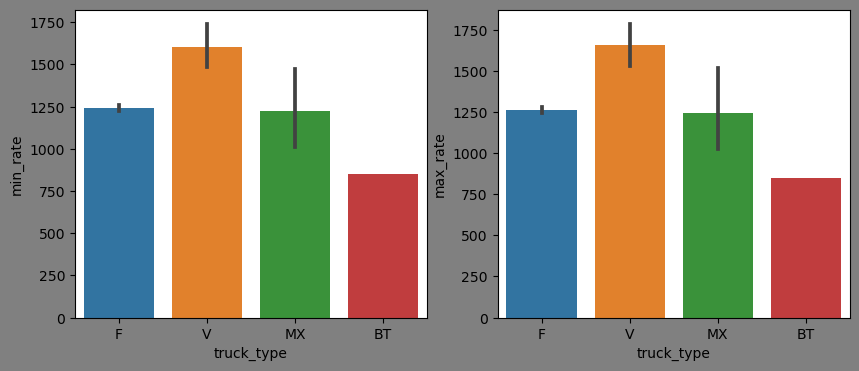

In [283]:
fig,axs=plt.subplots(1,2,figsize=(10,4),facecolor='Grey')
sns.barplot(x=df1['truck_type'],y=df1['min_rate'],ax=axs[0])
sns.barplot(x=df1['truck_type'],y=df1['max_rate'])

Rates are highest for V type trucks and lowest for BT type of trucks.

# City lane vs rate-

In [284]:
x=df1.groupby('city lane')[['min_rate','max_rate']].mean().reset_index().sort_values(by='min_rate',ascending=False)
x

,city lane,min_rate,max_rate
5273,RENTON-SARASOTA,6100.000000,6100.000000
3334,KALISPELL-SYRACUSE,6000.000000,6000.000000
4207,MILL CITY-MONTGOMERY,5916.666667,5916.666667
6218,WINSTON-LAKE CITY,5800.000000,5800.000000
4206,MILL CITY-LAKE CITY,5800.000000,5900.000000
...,...,...,...
2384,FORT DODGE-FORT DODGE,225.000000,225.000000
1429,CLEARFIELD-LITTLETON,225.000000,900.000000
1368,CHICAGO-CHICAGO,200.000000,200.000000
394,BALTIMORE-REISTERSTOW,200.000000,300.000000


In [285]:
c=x.head(30)
c

,city lane,min_rate,max_rate
5273,RENTON-SARASOTA,6100.000000,6100.000000
3334,KALISPELL-SYRACUSE,6000.000000,6000.000000
4207,MILL CITY-MONTGOMERY,5916.666667,5916.666667
6218,WINSTON-LAKE CITY,5800.000000,5800.000000
4206,MILL CITY-LAKE CITY,5800.000000,5900.000000
4698,OLDTOWN-AUBURNDALE,5500.000000,5500.000000
4709,OLDTOWN-LEWISBURG,5450.000000,5450.000000
1620,CORDELE-WOODBURN,5100.000000,5100.000000
5501,SCOTT CITY-VALE,4950.000000,4950.000000
1213,CARSON-NEWTOWN,4850.000000,4850.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'RENTON-SARASOTA'),
  Text(1, 0, 'KALISPELL-SYRACUSE'),
  Text(2, 0, 'MILL CITY-MONTGOMERY'),
  Text(3, 0, 'WINSTON-LAKE CITY'),
  Text(4, 0, 'MILL CITY-LAKE CITY'),
  Text(5, 0, 'OLDTOWN-AUBURNDALE'),
  Text(6, 0, 'OLDTOWN-LEWISBURG'),
  Text(7, 0, 'CORDELE-WOODBURN'),
  Text(8, 0, 'SCOTT CITY-VALE'),
  Text(9, 0, 'CARSON-NEWTOWN'),
  Text(10, 0, 'BURNEY-LONGUEUIL'),
  Text(11, 0, 'OLDTOWN-CUMMING'),
  Text(12, 0, 'OLDTOWN-BIRMINGHAM'),
  Text(13, 0, 'HIXON-N. BILLERIC'),
  Text(14, 0, 'EASTVALE-BAINBRIDGE'),
  Text(15, 0, 'OLDTOWN-RICHMOND'),
  Text(16, 0, 'MEXIA-VENTURA'),
  Text(17, 0, 'TACOMA-GENEVA'),
  Text(18, 0, 'OLDTOWN-ERWIN'),
  Text(19, 0, 'JOANNA-POCATELLO'),
  Text(20, 0, 'MCLEANSBORO-CORONA'),
  Text(21, 0, 'PRINCE GEOR-SCARBOROUGH'),
  Text(22, 0, 'COLUMBIA FA-GETTYSBURG'),
  Text(23, 0, 'EUGENE-NASHVILLE'),
  Text(24, 0

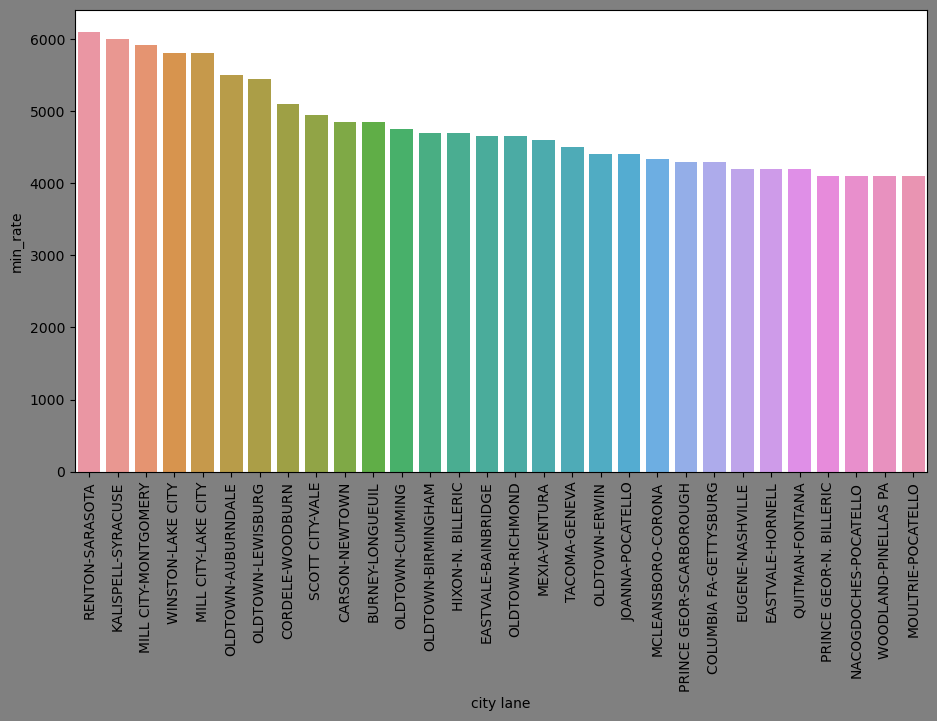

In [286]:
plt.figure(figsize=(11,6),facecolor='Grey')
sns.barplot(x=c['city lane'],y=c['min_rate'],data=c)
plt.xticks(rotation=90)

These are the city lanes where rates are highest.

In [287]:
x=df1.groupby('city lane')[['min_rate','max_rate']].mean().reset_index().sort_values(by='min_rate',ascending=True)
x

,city lane,min_rate,max_rate
5626,SIMSBORO-TULSA,50.000000,900.000000
1368,CHICAGO-CHICAGO,200.000000,200.000000
394,BALTIMORE-REISTERSTOW,200.000000,300.000000
2384,FORT DODGE-FORT DODGE,225.000000,225.000000
1429,CLEARFIELD-LITTLETON,225.000000,900.000000
...,...,...,...
4206,MILL CITY-LAKE CITY,5800.000000,5900.000000
6218,WINSTON-LAKE CITY,5800.000000,5800.000000
4207,MILL CITY-MONTGOMERY,5916.666667,5916.666667
3334,KALISPELL-SYRACUSE,6000.000000,6000.000000


In [288]:
c=x.head(50)
c

,city lane,min_rate,max_rate
5626,SIMSBORO-TULSA,50.000000,900.000000
1368,CHICAGO-CHICAGO,200.000000,200.000000
394,BALTIMORE-REISTERSTOW,200.000000,300.000000
2384,FORT DODGE-FORT DODGE,225.000000,225.000000
1429,CLEARFIELD-LITTLETON,225.000000,900.000000
6060,WEST BEND-MILWAUKEE,225.000000,350.000000
1869,DENVER-CENTENNIAL,237.500000,250.000000
2464,Ft Worth-Ft Worth,250.000000,250.000000
2282,EPHRATA-YORK,250.000000,250.000000
4488,NEW HAVEN-MERIDEN,250.000000,250.000000


These are the city lanes whose rates are lowest.

# State lane vs rate-

In [289]:
y=df1.groupby('state lane')[['min_rate','max_rate']].mean().reset_index().sort_values(by='min_rate',ascending=False)
y

,state lane,min_rate,max_rate
926,WA-FL,6100.000000,6100.000000
589,MT-NY,6000.000000,6000.000000
735,OR-NY,5916.666667,5916.666667
721,OR-FL,5800.000000,5850.000000
277,ID-FL,5500.000000,5500.000000
...,...,...,...
641,NE-NE,300.000000,300.000000
632,ND-ND,300.000000,300.000000
154,CT-CT,287.500000,287.500000
895,UT-UT,287.500000,287.500000


In [290]:
y.head(50)

,state lane,min_rate,max_rate
926,WA-FL,6100.000000,6100.000000
589,MT-NY,6000.000000,6000.000000
735,OR-NY,5916.666667,5916.666667
721,OR-FL,5800.000000,5850.000000
277,ID-FL,5500.000000,5500.000000
297,ID-WV,5450.000000,5450.000000
249,GA-OR,5100.000000,5100.000000
541,MO-OR,4950.000000,4950.000000
134,CA-PQ,4850.000000,4850.000000
925,WA-CT,4850.000000,4850.000000


These are the State lanes where rates are highest.

In [291]:
y=df1.groupby('state lane')[['min_rate','max_rate']].mean().reset_index().sort_values(by='min_rate',ascending=True)
y.head(50)

,state lane,min_rate,max_rate
259,IA-IA,225.000000,225.000000
154,CT-CT,287.500000,287.500000
895,UT-UT,287.500000,287.500000
632,ND-ND,300.000000,300.000000
641,NE-NE,300.000000,300.000000
141,CO-CO,317.763158,320.394737
812,SD-SD,325.000000,325.000000
414,MA-MA,350.000000,350.000000
709,OK-OK,350.000000,366.666667
985,WY-CO,360.714286,387.500000


These are the state lane where rates are lowest.

# Rates vs Time taken for the contract to get sold-

<AxesSubplot:xlabel='total_time_taken', ylabel='max_rate'>

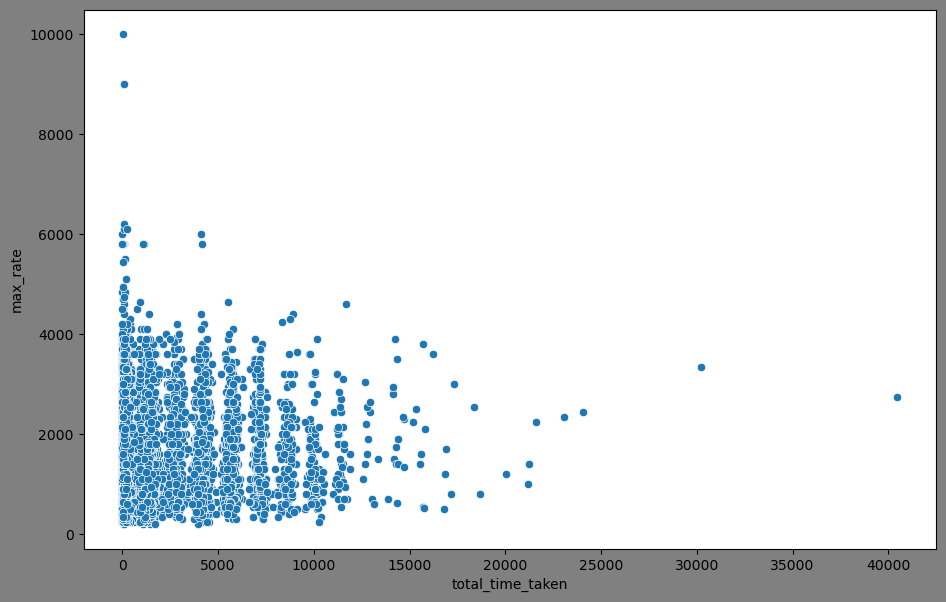

In [292]:
plt.figure(figsize=(11,7),facecolor='Grey')
sns.scatterplot(x=df1['total_time_taken'],y=df1['max_rate'],data=df1)

Here we can see that higher rates contracts gets sold quite early.